# Support Vector Machine (SVM)

- 딥러닝 이전에 분류에서 뛰어난 성능으로 많이 사용되었던 분류 모델
- 중간 크기의 데이터셋과 특성이(Feature) 많은 복잡한 데이터셋에서 성능이 좋은 것으로 알려져있다.

## 선형(Linear) SVM 

**선 (1)과 (2)중 어떤 선이 최적의 분류 선일까?**

![image.png](images/svm_margin0.png)

(2) 가 최적의 분류를 위한 경계선이다. 이유는 각 클래스의 별로 가장 가까이 있는 데이터간의 거리가 가장 넓기 때문이다. 넓다는 것은 그만큼 겹치는 부분이 적다는 것이므로 새로운 데이터를 예측할 때 모호성이 적어져서 맞을 확률이 더 높아지게 된다. **SVM 모델은 두 클래스 간의 거리를 가장 넓게 분리할 수있는 경계선을 찾는 것을 목표로 한다.**

## SVM 목표: support vector간의 가장 넓은 margin을 가지는결정경계를 찾는다.

- **Support Vector**
    - 양 클래스간에 가장 가까이 있는 값들을 말한다.
    - 결정경계 기준으로 양 클래스의 값들 중 결정경계와 가장 가까이 있는 값들이다.
- **margin**
    - 두 support vector간의 너비
- SVM 모델은 최대 마진(margin)을 만드는 결정경계를 찾는다.

> ### 결정경계(Decision boundary)란
> - 분류 문제에서 클래스들을 구분/분리하는 기준이다.
> - 분류 모델들은 학습시 train dataset을 이용해 결정경계를 찾는다.

![image.png](images/svm_margin.png)
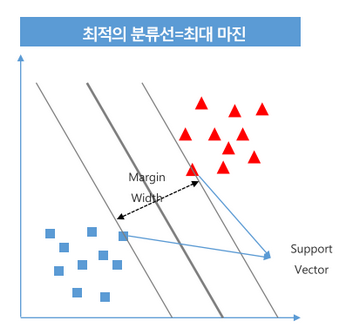

## Hard Margin, Soft Margin

- SVM은 데이터 포인트들을 잘 분리하면서 Margin 의 크기를 최대화하는 것이 목적이다. 
    - Margin의 최대화에 가장 문제가 되는 것이 Outlier(이상치) 들이다. 
    - Train set의 Outlier들은 Overfitting에 주 원인이 된다.
- Margine을 나눌 때 Outlier을 얼마나 무시할 것인지에 따라 Hard margin과 soft margin으로 나뉜다.
- **Hard Margin**
    - Outlier들을 무시하지 않고 Support Vector를 찾는다. 즉 어떤 데이터 포인트도 결정경계를 침범하지 않도록 한다. 그래서 Support Vector간의 거리(margin)이 매우 좁아 질 수 있다.
    - 선형적으로 분리가능할 때는 잘 작동하지만 그렇지 않을 경우 overfitting 문제가 발생할 수 있다.
- **Soft Margin**    
    - 일부 Outlier들을 무시하고 Support Vector를 찾는다. 즉 일부 데이터 포인트가 결정경계를 침범하여 잘못 분류되는 것을 허용한다. 그래서 Support Vector간의 거리(margin)을 넓힐 수있다.
    - 무시 비율을 하이퍼파라미터 `C`로 정한다. 무시비율이 너무 커지면 underfitting 문제가 발생할 수 있다.

![image.png](images/svm_c.png)
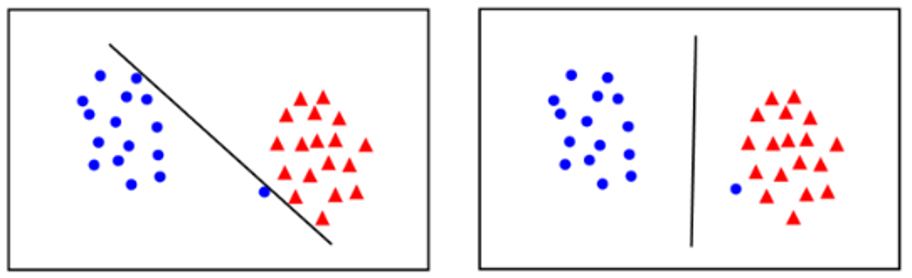

### Hard/Soft margin 설정 하이퍼파라미터 C
- SVM의 규제 하이퍼파라미터.
- 잘못 분류 되는 것을 허용하는 비율 설정 하이퍼파라미터.
- 노이즈가 있는 데이터나 선형적으로 분리 되지 않는 경우 **C값을** 조정해 마진을 변경한다.
- 기본값 1
- 값이 클 수록 무시비율을 낮게 해서 규제를 약하게 한다. 너무 크게 설정 하면 overfitting이 일어날 수 있다.
- 작을 수록 무시비율을 높여 규제를 강하게 한다. 너무 작게 설정 할 경우 underfitting이 일어날 수 있다.
- **Overfitting이 발생하면 값을 작게, Underfitting이 발생하면 크게 조정한다.**

## Kernel SVM (비선형(Non Linear) SVM)
### 비선형데이터 셋에 SVM 적용
- 선형으로 분리가 안되는 경우는?
 
![image.png](images/kernel_svm1.png)
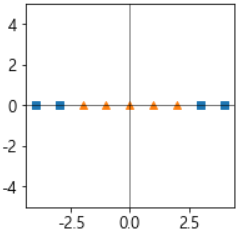

- 다항식 특성을 추가하여 차원을 늘려 선형 분리가 되도록 변환
  
![image.png](images/kernel_svm2.png)

[2차원으로 변환 $x_3=x_1^2$ 항 추가]
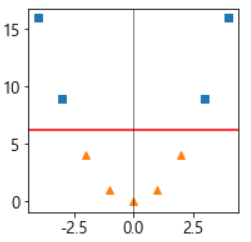

![image.png](images/kernel_svm3.png)

[원래 공간으로 변환]
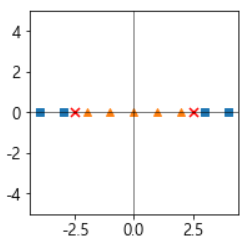

참고: https://www.youtube.com/watch?v=3liCbRZPrZA&t=42s

### Kernel trick(커널 트릭)
- 비선형 데이터셋을 선형으로 분리하기 위해 차원을 변경해야 하는데 이때 사용하는 함수를 **Kernel**이라고 하고 차원을 변경하는 것을 **kernel trick** 이라고 한다.
    - 대표적인 kernel함수 
        - **Radial kernel**
        - Polynomial kernel
        - Sigmoid kernel

### Non linear SVM 모델의 하이퍼파라미터
- C
    - Softmargin과 hard margin 적용 값
- gamma
    - 비선형 결정정계를 얼마나 유연하게 만들 지 조절하는 규제 하이퍼파라미터.
        - Linear SVM의 경우 gamma 값의 영향을 받지 않는다.
    - 개별 데이터포인트가 결정 경계를 만드는데 어느 정도 영향력을 주는지를 설정하는 값이다. 
        - 값을 크게 하면 개별 데이터 포인트의 결정 경계의 굴곡에 대해 영향을 미치는 범위가 작아져 결정 경계가 데이터 포인트 주변으로 좁혀져 개별 데이터 포인트에 민감하게 반응한다. (약한 규제) 너무 크게하면 overfitting이 발생할 수 있다. 
        - 값을 작게 하면 개별 데이터 포인트의 결정 경계의 굴곡에 대해 영향을 미치는 범위가 넓어져 부드러운 결정 경계를 만들고 개별 데이터 포인트에 민감하게 반응하지 않는다. (강한 규제) 너무 작게 하면 underfitting이 발생 할 수 있다.
    - **Overfitting이 발생하면 값을 작게, Underfitting이 발생하면 크게 조정한다.**

#### gamma 값에 따른 결정경계 형태
![gamma](images/svm_gamma.png)

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [2]:
##### SVM 전처리
### 연속형(수치형) - Feature scaling
### 범주형 - One Hot Encoding
from sklearn.preprocessing import StandardScaler#, OneHotEncoder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Linear SVM - hyper parameter: C
C_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_acc_list = []
test_acc_list = []

In [21]:
from sklearn.svm import SVC  # SVR: 회귀, SVC: 분류
from sklearn.metrics import accuracy_score
for C in C_list:
    svm = SVC(
        kernel="linear", # 커널 함수 지정. 선형SVM: linear, 비선형SVM: rbf(기본), poly, sigmoid
        C=C, # soft - hard margin 설정. (작을수록 강한 규제)
        # gamma=100, # 비선형 svm의 hyperparameter 
        random_state=0
    )
    svm.fit(X_train_scaled, y_train)
    pred_train = svm.predict(X_train_scaled)
    pred_test = svm.predict(X_test_scaled)
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [10]:
np.log10 # 밑: 10
np.log2  # 밑: 2
np.log   # 밑: 자연상수 e

<ufunc 'log'>

In [17]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    "C":np.log10(C_list),
    "Train": train_acc_list,
    "Test": test_acc_list
})
df.set_index("C")

,Train,Test
C,,
-3.0,0.941315,0.930070
-2.0,0.974178,0.972028
-1.0,0.988263,0.972028
0.0,0.990610,0.965035
1.0,0.995305,0.958042
2.0,0.995305,0.958042


In [22]:
import numpy as np
df = pd.DataFrame({
    "C":np.log10(C_list),
    "Train": train_acc_list,
    "Test": test_acc_list
})
df.set_index("C")

,Train,Test
C,,
-3.0,0.941315,0.930070
-2.0,0.974178,0.972028
-1.0,0.988263,0.972028
0.0,0.990610,0.965035
1.0,0.995305,0.958042
2.0,0.995305,0.958042


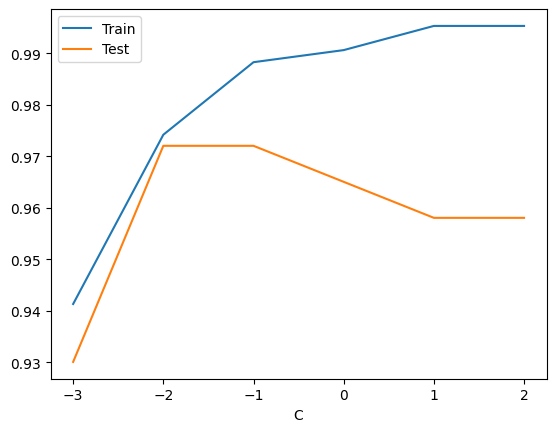

In [18]:
df.set_index("C").plot();

In [24]:
### 비선형 SVM. Hyper Parameter - C: soft/hard margin 규제, gamma (기본: 1)
# gamma  변경에 따른 성능 변화.
gamma_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]
train_acc_list = []
test_acc_list = []
for gamma in gamma_list:
    svm = SVC(kernel="rbf", C=1, gamma=gamma)  # kernel기본값: rbf
    svm.fit(X_train_scaled, y_train)
    train_acc_list.append(accuracy_score(y_train, svm.predict(X_train_scaled)))
    test_acc_list.append(accuracy_score(y_test, svm.predict(X_test_scaled)))

In [26]:
df = pd.DataFrame({
    "gamma":np.log10(gamma_list),
    "Train":train_acc_list,
    "Test":test_acc_list
})
df

,gamma,Train,Test
0,-3.00000,0.950704,0.958042
1,-2.00000,0.976526,0.965035
2,-1.00000,0.995305,0.937063
3,0.00000,1.000000,0.629371
4,0.69897,1.000000,0.629371
5,1.00000,1.000000,0.629371
6,2.00000,1.000000,0.629371


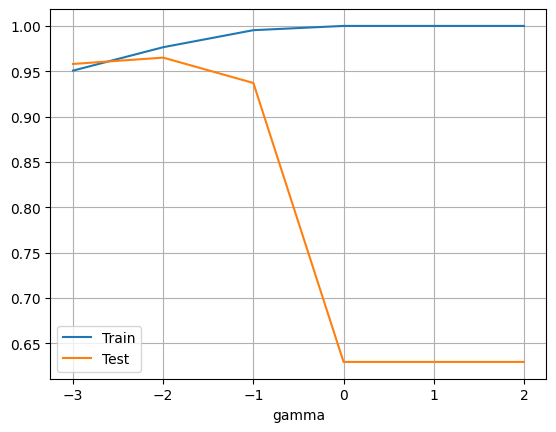

In [28]:
df.set_index("gamma").plot(grid=True);

##### ROC AUC score, AP score 

In [34]:
from sklearn.metrics import roc_auc_score, average_precision_score
# roc_auc_score(정답, 추정한 양성의 확률)  -> model.predict_proba(X)[:, 1]
svm = SVC(probability=True)  # probability=True 설정해야 predict_proba() 사용가능.
svm.fit(X_train_scaled, y_train)
pos_proba = svm.predict_proba(X_train_scaled)[:, 1]
print(roc_auc_score(y_train, pos_proba))
print(average_precision_score(y_train, pos_proba))

0.997880008479966
0.9985299004450608


## GridSearch로 최적의 조합찾기

##### GridSearchCV 생성 및 학습
- LinearSVC: C
- RBF SVC: C, gamma

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [37]:
### Pipeline -> 1) scaler 2) svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm", SVC(random_state=0, probability=True))
])
params = {
    "svm__kernel":["linear", "rbf", "poly", "sigmoid"], 
    "svm__C": [0.001, 0.01, 0.1, 1, 10, 100], 
    "svm__gamma": [0.001, 0.01, 0.1, 1, 10, 100]
}
gs = GridSearchCV(pipeline, params, 
                         scoring=["accuracy", "average_precision", "roc_auc"],
                         refit="accuracy", cv=4, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(probability=True,
                                            random_state=0))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             refit='accuracy',
             scoring=['accuracy', 'average_precision', 'roc_auc'])

In [38]:
### 결과 확인
gs.best_params_

{'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

In [39]:
gs.best_score_

0.9836007758772702

In [45]:
pd.options.display.max_colwidth  = 100 # 컬럼의 값을 몇글자 까지 다 보여줄지.

In [47]:
result = pd.DataFrame(gs.cv_results_)
result.sort_values("rank_test_roc_auc")[result.columns[7:]].head()

,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_average_precision,split1_test_average_precision,...,mean_test_average_precision,std_test_average_precision,rank_test_average_precision,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
101,"{'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}",0.981308,0.971963,0.990566,0.990566,0.983601,0.007709,1,0.999567,0.993349,...,0.998062,0.002722,1,0.999254,0.990672,0.999235,0.999621,0.997195,0.003770,1
121,"{'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}",0.981308,0.981308,0.990566,0.962264,0.978862,0.010301,2,1.000000,0.993349,...,0.997823,0.002618,2,1.000000,0.990672,0.998086,0.998485,0.996811,0.003616,2
56,"{'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kernel': 'linear'}",0.971963,0.981308,0.981132,0.952830,0.971808,0.011591,11,1.000000,0.994536,...,0.997618,0.001968,3,1.000000,0.992164,0.996173,0.996970,0.996327,0.002795,3
68,"{'svm__C': 0.1, 'svm__gamma': 100, 'svm__kernel': 'linear'}",0.971963,0.981308,0.981132,0.952830,0.971808,0.011591,11,1.000000,0.994536,...,0.997618,0.001968,3,1.000000,0.992164,0.996173,0.996970,0.996327,0.002795,3
123,"{'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'sigmoid'}",0.971963,0.981308,0.981132,0.952830,0.971808,0.011591,11,1.000000,0.994536,...,0.997618,0.001968,3,1.000000,0.992164,0.996173,0.996970,0.996327,0.002795,3


In [48]:
# 최종평가
best_model = gs.best_estimator_
pred_test = best_model.predict(X_test)
accuracy_score(y_test, pred_test)

0.972027972027972

In [49]:
type(best_model)

sklearn.pipeline.Pipeline